In [2]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [3]:
pip install tensorflow

In [4]:
from tensorflow.keras import models, layers, utils, backend as K
import matplotlib.pyplot as plt


In [5]:
#Importing necessary Libraries
import numpy as np
import tensorflow as tf

In [6]:
!pip install PyDrive #this is just to make the whole thing on google drive, needed later


In [7]:
!pip install -q xlrd

In [8]:
#importing the necessary libraries
import os #operating system
from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [10]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [11]:
download = drive.CreateFile({'id': '1Te-q3_8Na8JImPF2FjyOx3KYtvvyuGkc'}) #downloads the file of the dataset, the ID is obtained from after the following block for the train_LbEl.. zip file
#download = drive.CreateFile({'id': '1Mmpl2Z2IbP5MRmagxP2me89idCpUcBU1'}) #downloads the file of the dataset, the ID is obtained from after the following block for the train_LbEl.. zip file

In [12]:
download.GetContentFile('Concrete_Data.xls')

In [13]:
pip install xlrd==1.2.0

     |████████████████████████████████| 103 kB 24.4 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [14]:

d3 = pd.read_excel('Concrete_Data.xls')

In [15]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [16]:
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregare", "Age", "CC_Strength"]
curr_col_names = list(d3.columns)

mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]

d3 = d3.rename(columns=mapper)

In [17]:


#Independent variables
X = d3.iloc[:,:-1]
#dependent variable
Y = d3.iloc[:,-1] 

In [18]:
Y

0       79.986111
1       61.887366
2       40.269535
3       41.052780
4       44.296075
          ...    
1025    44.284354
1026    31.178794
1027    23.696601
1028    32.768036
1029    32.401235
Name: CC_Strength, Length: 1030, dtype: float64

In [19]:
train_dataset = d3.sample(frac=0.8, random_state=0)
test_dataset = d3.drop(train_dataset.index)

 

In [20]:
#Independent variables
X = train_dataset.iloc[:,:-1]
#dependent variable
Y = train_dataset.iloc[:,-1] 

#Independent variables
X_test = test_dataset.iloc[:,:-1]
#dependent variable
Y_test = test_dataset.iloc[:,-1]

In [21]:
d3.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregare,Age,CC_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [22]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
Cement,280.270971,104.483845
BlastFurnaceSlag,73.170910,85.865408
FlyAsh,55.317124,64.097588
Water,182.029053,21.288882
Superplasticizer,6.146244,6.000398
CoarseAggregate,973.990789,77.755716
FineAggregare,771.896408,80.030794
Age,45.708738,63.603343
CC_Strength,35.739427,16.582077


In [23]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('CC_Strength')
test_labels = test_features.pop('CC_Strength')

In [24]:
train_features

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregare,Age
747,500.0,0.00,0.00,200.00,0.00,1125.0,613.0,3
718,122.6,183.90,0.00,203.50,0.00,958.2,800.1,7
175,362.6,189.00,0.00,164.90,11.60,944.7,755.8,91
828,522.0,0.00,0.00,146.00,0.00,896.0,896.0,28
713,157.0,236.00,0.00,192.00,0.00,935.4,781.2,3
...,...,...,...,...,...,...,...,...
673,212.0,141.30,0.00,203.50,0.00,973.4,750.0,7
595,186.2,124.10,0.00,185.70,0.00,1083.4,764.3,28
445,165.0,0.02,143.57,163.81,0.00,1005.6,900.9,56
117,313.3,262.20,0.00,175.50,8.60,1046.9,611.8,28


In [25]:
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.7.0


In [26]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [27]:
normalizer.adapt(np.array(train_features))

In [28]:
print(normalizer.mean.numpy())

[[280.271      73.170906   55.31712   182.02904     6.1462445 973.99084
  771.8964     45.708733 ]]


In [29]:
######################### Linear reg WITH ONE VARIABLE  


In [30]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[ 500.    0.    0.  200.    0. 1125.  613.    3.]]

Normalized: [[ 2.1  -0.85 -0.86  0.84 -1.02  1.94 -1.99 -0.67]]


In [31]:

CementT = np.array(train_features['Cement'])

CementT_normalizer = layers.Normalization(input_shape=[1,], axis=None)
CementT_normalizer.adapt(CementT)

In [32]:
np.size(CementT)
print(0.8*1030)

824.0


In [33]:
CementT_model = tf.keras.Sequential([
    CementT_normalizer,
    layers.Dense(units=1)
])

CementT_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [34]:
CementT_model.predict(CementT[:10])

array([[-1.5967734 ],
       [ 1.1457967 ],
       [-0.59828603],
       [-1.7566476 ],
       [ 0.8958115 ],
       [-0.72109854],
       [-0.5503237 ],
       [ 0.65352935],
       [-1.8874538 ],
       [-0.4485856 ]], dtype=float32)

In [35]:
CementT_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [36]:
%%time
history = CementT_model.fit(
    train_features['Cement'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 5.4 s, sys: 305 ms, total: 5.71 s
Wall time: 10.7 s


In [37]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,11.885419,11.803761,95
96,11.887644,11.744624,96
97,11.880498,11.768040,97
98,11.884850,11.744402,98
99,11.878765,11.760054,99


In [38]:
import matplotlib.pyplot as plt

In [45]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 20])
  plt.xlabel('Epoch')
  plt.ylabel('Error [CC_Strength]')
  plt.legend()
  plt.grid(True)

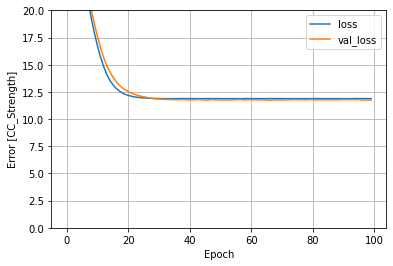

In [46]:
plot_loss(history)

In [47]:
test_results = {}

test_results['CementT_model'] = CementT_model.evaluate(
    test_features['Cement'],
    test_labels, verbose=0)

In [53]:
x = tf.linspace(0.0, 823, 824)
y = CementT_model.predict(x)

In [54]:
def plot_concrete(x, y):
  plt.scatter(train_features['Cement'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Cement')
  plt.ylabel('CC_Strength')
  plt.legend()

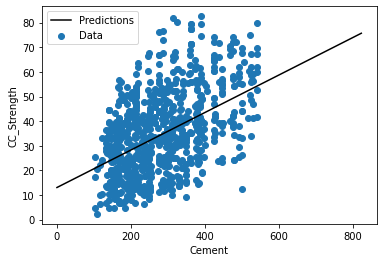

In [55]:
plot_concrete(x, y)

In [ ]:
######################### Linear reg WITH MULTIPLE VARIABLE  #########################

In [56]:
#Build the model 
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [57]:
linear_model.predict(train_features[:10])

array([[ 1.6179893 ],
       [ 0.73048675],
       [-0.33752844],
       [ 1.8906912 ],
       [ 0.5618684 ],
       [-0.37572554],
       [ 0.23431808],
       [-0.8399616 ],
       [ 1.4234028 ],
       [ 0.67023337]], dtype=float32)

In [58]:
linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(8, 1) dtype=float32, numpy=
array([[ 0.1216262 ],
       [-0.3431492 ],
       [-0.76361525],
       [ 0.02941376],
       [-0.4343566 ],
       [-0.05300713],
       [ 0.08028615],
       [-0.30142778]], dtype=float32)>

In [59]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [60]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 5.46 s, sys: 331 ms, total: 5.79 s
Wall time: 10.6 s


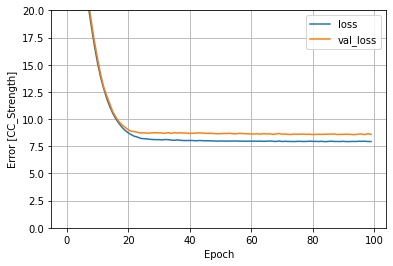

In [61]:
plot_loss(history)

In [62]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [ ]:
##################### Neural network with one layer ############################

In [63]:

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [64]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [65]:

def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model


In [66]:
dnn_cement_model = build_and_compile_model(CementT_normalizer)

In [67]:
dnn_cement_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                128       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [68]:
%%time
history = dnn_cement_model.fit(
    train_features['Cement'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 6.54 s, sys: 371 ms, total: 6.91 s
Wall time: 6.38 s


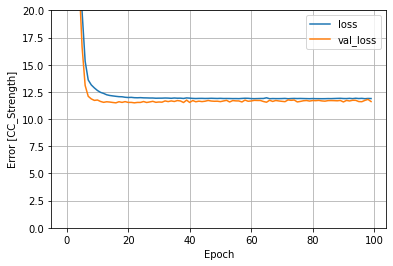

In [69]:
plot_loss(history)

In [70]:
x = tf.linspace(0.0, 824, 825)
y = dnn_cement_model.predict(x)
y_pred3 = np.array(dnn_cement_model.predict(test_features['Cement']))


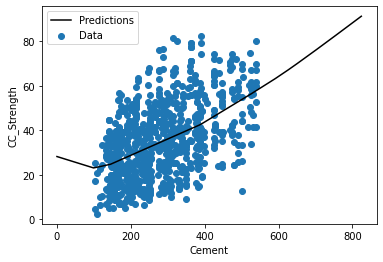

In [72]:
plot_concrete(x, y)

In [73]:
test_results['dnn_cement_model'] = dnn_cement_model.evaluate(
    test_features['Cement'], test_labels,
    verbose=0)

In [74]:

from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

In [76]:
dnn_cement_model.fit(train_features['Cement'], train_labels, validation_data=(test_features['Cement'], test_labels), epochs=100,batch_size=10)

Epoch 1/100
83/83 [==============================] - 0s 3ms/step - loss: 11.8920 - val_loss: 11.8811
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 11.8933 - val_loss: 11.9563
Epoch 3/100
83/83 [==============================] - 0s 3ms/step - loss: 11.8671 - val_loss: 11.9209
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 11.8669 - val_loss: 11.8720
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 11.8558 - val_loss: 11.8724
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 11.8609 - val_loss: 11.9015
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 11.8624 - val_loss: 11.9086
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 11.8973 - val_loss: 11.8661
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 11.9000 - val_loss: 12.0905
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 11.8999 - val_los

In [77]:
y_pred3

array([[28.606491],
       [51.240276],
       [24.458206],
       [41.888676],
       [46.47728 ],
       [28.606491],
       [31.454765],
       [46.47728 ],
       [31.454765],
       [41.888676],
       [41.888676],
       [36.323925],
       [28.606491],
       [36.323925],
       [41.449356],
       [46.226597],
       [46.226597],
       [43.90024 ],
       [37.76637 ],
       [40.614643],
       [35.027924],
       [40.614643],
       [37.004875],
       [46.226597],
       [51.240276],
       [50.638638],
       [35.027924],
       [38.8061  ],
       [46.226597],
       [46.226597],
       [43.90024 ],
       [37.76637 ],
       [41.85207 ],
       [41.449356],
       [41.52258 ],
       [42.61085 ],
       [56.965733],
       [46.226597],
       [43.90024 ],
       [40.614643],
       [46.226597],
       [43.90024 ],
       [40.614643],
       [47.63043 ],
       [40.614643],
       [38.8061  ],
       [30.346209],
       [28.31947 ],
       [28.026587],
       [28.026587],


In [ ]:
##################### Neural network with multiple  layer ############################

In [78]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 8)                17        
 n)                                                              
                                                                 
 dense_5 (Dense)             (None, 64)                576       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,818
Trainable params: 4,801
Non-trainable params: 17
_________________________________________________________________


In [79]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 6.9 s, sys: 428 ms, total: 7.33 s
Wall time: 6.51 s


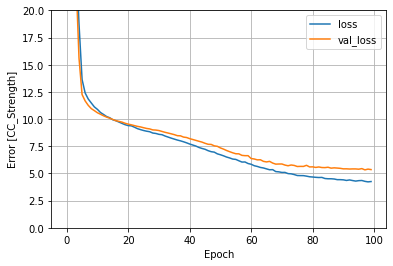

In [80]:
plot_loss(history)

In [81]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [82]:
pd.DataFrame(test_results, index=['Mean absolute error [CC_Strength]']).T

,Mean absolute error [CC_Strength]
CementT_model,11.847009
linear_model,8.206689
dnn_cement_model,11.868187
dnn_model,5.079147


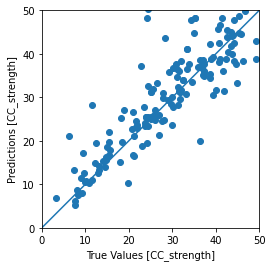

In [83]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [CC_strength]')
plt.ylabel('Predictions [CC_strength]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

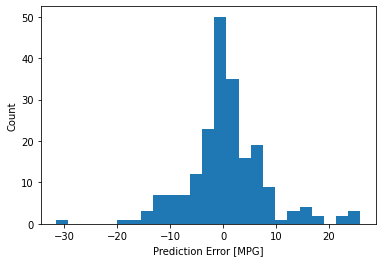

In [84]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')